In [1]:
%run functions.ipynb
from ipywidgets import interact
import ipywidgets as widgets

data_path='../data/'
filename='hidden-symbols.tif'
image_path=data_path+filename


# Equalization
size= widgets.IntSlider(value=3, step=2, min=3, max=100, description="Wielkość sąsiedztwa")
interact(lokalne_wyrownanie_histogramu,image_path=image_path, size=size)

interactive(children=(Text(value='../data/hidden-symbols.tif', description='image_path'), IntSlider(value=3, d…

<function __main__.lokalne_wyrownanie_histogramu(image_path, size)>

160.65635681152344 102.9979258068639


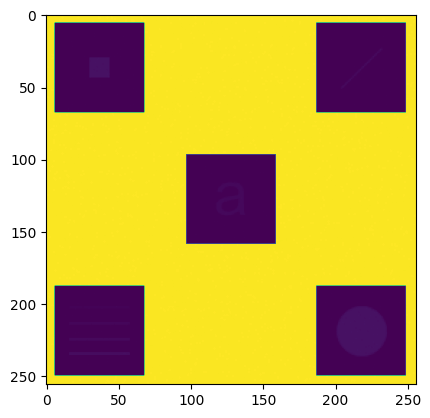

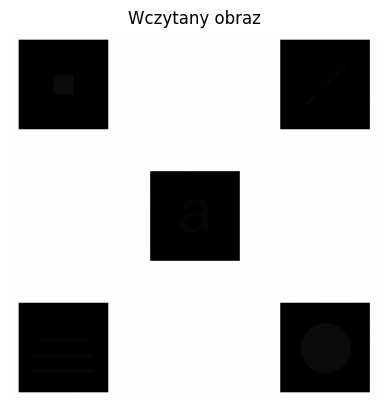

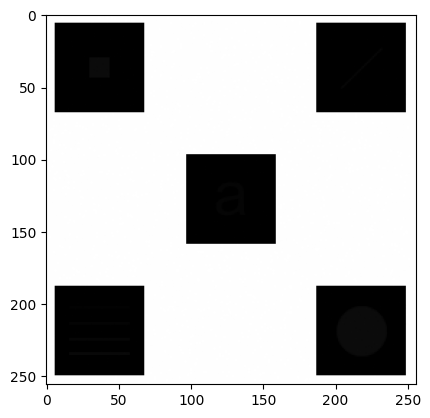

In [20]:
from PIL import Image
from scipy import ndimage
def lokalne_statystyki(image_path, size, fill=0):
    """
    size is UNEVEN number
    """
    image=Image.open(image_path).convert('L')
    pixels = np.array(image)
    #pixels=np.array(([1,2,3,4,5], [9,8,7,6,5], [5,6,7,8,9], [5,4,3,2,1], [0,3,4,5,2]))
    (width, height)=pixels.shape
    local_means= np.zeros((width, height))
    locals_sd=np.zeros((width, height))
    halfsize=int(size/2)
    for i in range(height):
        for j in range(width):
            neighbourhood=np.zeros((size, size))
            if halfsize<=i<height-halfsize and halfsize<=j<width-halfsize:
                m=0
                n=0
                for k in range (i-halfsize, i+halfsize+1):
                    for l in range(j-halfsize, j+halfsize+1):
                        neighbourhood[m][n]=pixels[k][l]
                        n+=1
                    m+=1
                    n=0
            else:
                m=0
                n=0
                for k in range (i-halfsize, i+halfsize+1):
                    for l in range(j-halfsize, j+halfsize+1):
                        if k<0 or k>= height or l<0 or l>=width:
                            neighbourhood[m][n]=fill
                        else:
                            neighbourhood[m][n]=pixels[k][l]
                        n+=1
                    n=0
                    m+=1
                        
            local_means[i][j]=ndimage.mean(neighbourhood)
            locals_sd[i][j]=ndimage.standard_deviation(neighbourhood)
    return (local_means, locals_sd)

def lokalne_statystyki_poprawa_jakosci(image_path, size, k0, k1, k2,k3, C):
    """
    image_path - sciezka do obrazu, dla ktorego ma zostac wykonane przeksztalcenie
    size - wielkosc sasiedztwa
    """
    image=Image.open(image_path).convert('L')
    pixels = np.array(image)
    (width, height)=pixels.shape
    new_pixels= np.zeros((width, height))
    global_mean_intensity=ndimage.mean(pixels)
    global_standard_deviation=ndimage.standard_deviation(pixels)
    (local_means, locals_sd)=lokalne_statystyki(image_path, size)
    print(global_mean_intensity, global_standard_deviation)
    for i in range(height):
        for j in range(width):
            if k0*global_mean_intensity<=local_means[i][j]<=k1*global_mean_intensity and k2*global_standard_deviation<=locals_sd[i][j]<=k3*global_standard_deviation:
                new_pixels[i][j]=C*pixels[i][j]
            else:
                new_pixels[i][j]=pixels[i][j]
    plt.figure()
    plt.imshow(new_pixels)#, cmap='gray')
    plt.show()
    return new_pixels

new_image=lokalne_statystyki_poprawa_jakosci(image_path, 3,22.8,0,0.1,0,0.1)

load_and_display_image(image_path)
plt.figure()
plt.imshow(new_image, cmap='gray')
plt.show()